## Get Data from MongoDB using PySpark

In [1]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession, SQLContext, HiveContext
from pyspark.sql.functions import *

In [2]:
conf = pyspark.SparkConf().set("spark.jars.packages", 
                               "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1").setMaster("local").setAppName("newApp").setAll([("spark.driver.memory", "15g"), ("spark.executer.memory", "20g")])
sc = SparkContext(conf=conf)

'''spark = SparkSession.builder \
    .master('local[*]') \
    .config("spark.driver.memory", "15g") \
    .appName('newApp') \
    .getOrCreate()'''

sqlC = SQLContext(sc)

mongo_ip = "mongodb://localhost:27017/basan-son-data."
print(mongo_ip)

mongodb://localhost:27017/basan-son-data.


In [3]:
iris = sqlC.read.format("com.mongodb.spark.sql.DefaultSource").option("uri", mongo_ip + "Iris").load()

In [4]:
iris.createOrReplaceTempView("iris")

In [5]:
iris = sqlC.sql("SELECT * FROM iris")

In [6]:
iris.printSchema()

root
 |-- AVG_%_Processor_Time: double (nullable = true)
 |-- HR_Time: timestamp (nullable = true)
 |-- MAX_%_Processor_Time: integer (nullable = true)
 |-- MIN_%_Processor_Time: integer (nullable = true)
 |-- Processor: string (nullable = true)
 |-- SHIFTPERIOD: integer (nullable = true)
 |-- SUM_%_Processor_Time: integer (nullable = true)
 |-- Server_Name: string (nullable = true)
 |-- Timestamp: long (nullable = true)
 |-- WRITETIME: long (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



## Operating on Data

Data is partitioned into client names and got the total processor usage.

In [7]:
aig = iris.filter(iris.Server_Name.contains('aig') & iris.Processor.contains('_Total'))
eti = iris.filter(iris.Server_Name.contains('eti') & iris.Processor.contains('_Total'))
tuv = iris.filter(iris.Server_Name.contains('tuv') & iris.Processor.contains('_Total'))
aho = iris.filter(iris.Server_Name.contains('aho') & iris.Processor.contains('_Total'))
zor = iris.filter(iris.Server_Name.contains('zor') & iris.Processor.contains('_Total'))

Functions for different graph types

In [43]:
import matplotlib.pyplot as plt

def draw_hourly_chart(dataframe, title):
    
    client_hours = dataframe.select(hour('HR_Time')).distinct().orderBy('hour(HR_Time)')
    #empty arrays to be filled (will be used in matplotlib graphs)
    x = []
    y = []
    temp = []
    days = 31
    
    for anhour in client_hours.collect():
        x.append(anhour[0]) #insert hour names into array to be used in x axis
        #her saat için avg processor time columnı topla
        df_for_hour = dataframe.filter(hour('HR_Time') == lit(anhour[0])).groupBy().sum('AVG_%_Processor_Time')
        temp.append(df_for_hour.toPandas()["sum(AVG_%_Processor_Time)"].values.tolist())
        
    for i in range(0,len(temp)):
        y.append(temp[i][0])
        
    y1 = [value / days for value in y]
    plt.xticks(x)
    plt.title(title)
    plt.bar(x,y1)
    plt.show()

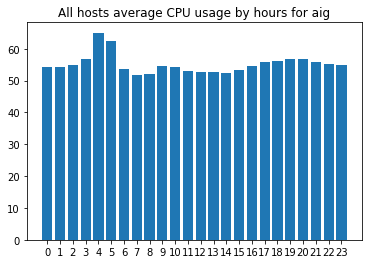

In [44]:
title = "All hosts average CPU usage by hours for aig"
draw_hourly_chart(aig, title)

For different hosts

In [45]:
aig_A =  aig.filter(aig.Server_Name.contains('A'))
aig_B =  aig.filter(aig.Server_Name.contains('B'))
aig_C =  aig.filter(aig.Server_Name.contains('C'))
aig_D =  aig.filter(aig.Server_Name.contains('D'))
aig_E =  aig.filter(aig.Server_Name.contains('E'))
aig_F =  aig.filter(aig.Server_Name.contains('F'))
aig_G =  aig.filter(aig.Server_Name.contains('G'))
aig_H =  aig.filter(aig.Server_Name.contains('H'))
aig_I =  aig.filter(aig.Server_Name.contains('I'))
aig_J =  aig.filter(aig.Server_Name.contains('J'))

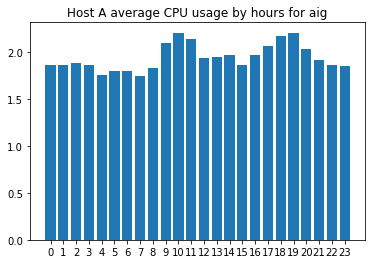

In [46]:
title = "Host A average CPU usage by hours for aig"
draw_hourly_chart(aig_A, title)